In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import ensemble
import graphviz 

# ucitavanje podataka
data = pd.read_csv('/content/drive/MyDrive/data_2.csv',header=None)
data = data.values

# podjela na trening, test skup i validacioni skup
x_train, x_validation, y_train, y_validation = train_test_split(data[:,0:6], data[:,6], test_size=0.2)

In [27]:
br_stabala = np.arange(2,60,3)
br_prediktora = [1,4,6]
acc_train = np.zeros([len(br_stabala),len(br_prediktora)])
acc_validation = np.zeros([len(br_stabala),len(br_prediktora)])

for i in range(0,len(br_stabala)):
  for j in range(0,len(br_prediktora)):
    # obucavanje
    clf = ensemble.RandomForestClassifier(n_estimators=br_stabala[i],max_features=br_prediktora[j])
    clf = clf.fit(x_train,y_train)

    # predikcija na trening skupu
    y_predict = clf.predict(x_train)
    cm = confusion_matrix(y_train,y_predict)
    acc_train[i,j] = (cm[0,0]+cm[1,1])/len(y_train)*100

    # predikcija na validacionom skupu
    y_predict_validation = clf.predict(x_validation)
    cm = confusion_matrix(y_validation,y_predict_validation )
    acc_validation[i,j] = (cm[0,0]+cm[1,1])/len(y_validation )*100


Text(0.5, 1.0, 'Random Forest - trening skup')

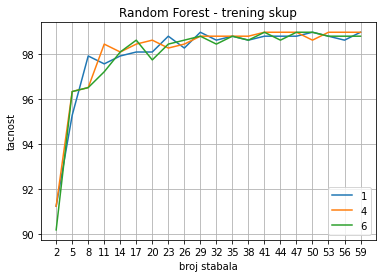

In [28]:
fig, axs = plt.subplots()
plt.plot(acc_train[:,0])
plt.plot(acc_train[:,1])
plt.plot(acc_train[:,2])
axs.set_xticks(np.arange(len(br_stabala)))
axs.set_xticklabels(br_stabala) 
plt.grid()
plt.legend([str(br_prediktora[0]),str(br_prediktora[1]),str(br_prediktora[2])])
plt.xlabel('broj stabala')
plt.ylabel('tacnost')
plt.title('Random Forest - trening skup')

Text(0.5, 1.0, 'Random Forest - validacioni skup')

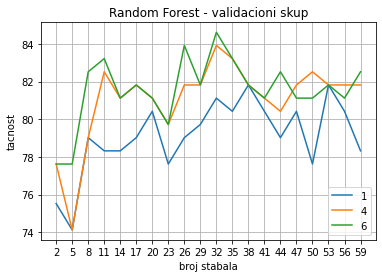

In [29]:
fig, axs = plt.subplots()
plt.plot(acc_validation[:,0])
plt.plot(acc_validation[:,1])
plt.plot(acc_validation[:,2])
axs.set_xticks(np.arange(len(br_stabala)))
axs.set_xticklabels(br_stabala) 
plt.grid()
plt.legend([str(br_prediktora[0]),str(br_prediktora[1]),str(br_prediktora[2])])
plt.xlabel('broj stabala')
plt.ylabel('tacnost')
plt.title('Random Forest - validacioni skup')

Text(0.5, 1.0, 'Gradient Boosting - trening skup')

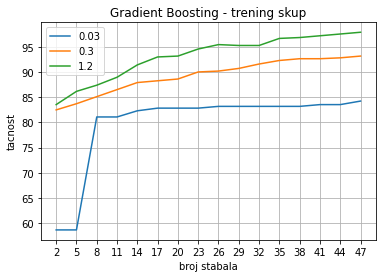

In [76]:
br_stabala = np.arange(2,50,3)
stopa_ucenja = [0.03,0.3,1.2]
acc_train = np.zeros([len(br_stabala),len(stopa_ucenja)])
acc_validation = np.zeros([len(br_stabala),len(stopa_ucenja)])

for i in range(0,len(br_stabala)):
  for j in range(0,len(stopa_ucenja)):
    # obucavanje
    clf = ensemble.GradientBoostingClassifier(n_estimators=br_stabala[i],learning_rate=stopa_ucenja[j])
    clf = clf.fit(x_train,y_train)

    # predikcija na trening skupu
    y_predict = clf.predict(x_train)
    cm = confusion_matrix(y_train,y_predict)
    acc_train[i,j] = (cm[0,0]+cm[1,1])/len(y_train)*100

    # predikcija na validacionom skupu
    y_predict_validation = clf.predict(x_validation)
    cm = confusion_matrix(y_validation,y_predict_validation )
    acc_validation[i,j] = (cm[0,0]+cm[1,1])/len(y_validation )*100

fig, axs = plt.subplots()
plt.plot(acc_train[:,0])
plt.plot(acc_train[:,1])
plt.plot(acc_train[:,2])
axs.set_xticks(np.arange(len(br_stabala)))
axs.set_xticklabels(br_stabala) 
plt.grid()
plt.legend([str(stopa_ucenja[0]),str(stopa_ucenja[1]),str(stopa_ucenja[2])])
plt.xlabel('broj stabala')
plt.ylabel('tacnost')
plt.title('Gradient Boosting - trening skup')

Text(0.5, 1.0, 'Gradient Boosting - validacioni skup')

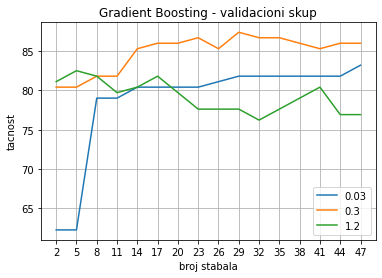

In [77]:
fig, axs = plt.subplots()
plt.plot(acc_validation[:,0])
plt.plot(acc_validation[:,1])
plt.plot(acc_validation[:,2])
axs.set_xticks(np.arange(len(br_stabala)))
axs.set_xticklabels(br_stabala) 
plt.grid()
plt.legend([str(stopa_ucenja[0]),str(stopa_ucenja[1]),str(stopa_ucenja[2])])
plt.xlabel('broj stabala')
plt.ylabel('tacnost')
plt.title('Gradient Boosting - validacioni skup')